In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# I. Problem 2: Larger unlabeled subset

Now we will work with the larger, unlabeled subset in 'p2\_unsupervised'. This dataset is has not been processed, so you should process \textbf{using the same log transform} as in Problem 1.

## Part 1. Visualization

A scientist tells you that cells in the brain are either excitatory neurons, inhibitory neurons, or non-neuronal cells. Cells from each of these three groups server different functions within the brain. Within each of these three types, there are numerous distinct sub-types that cell can be, and sub-types of the same larger class can serve similar functions. Your goal is to produce visualizations which show how the scientist's knowledge reflects in the data.

As in Problem 1, we recommend \textbf{using PCA before running T-SNE or clustering algorithms}, for quality and computational reasons.

## QUESTION 1
Provide at least on visualization which clearly shows the existence of 3 main brain cell types as described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from different groups can differ greatly.

In [2]:
X = np.load('./gene_analysis_data/p2_unsupervised/X.npy')
X.shape

(2169, 45768)

In [3]:
mx = -1
for a in X:
    if a[0] > mx:
        mx = a[0]
mx

61.77721743231262

In [4]:
X.max(axis=0)

array([  61.77721743,    0.        , 1183.63034554, ...,    0.        ,
          0.        ,    0.        ])

## 2. Transform the Data

In [5]:
X = np.apply_along_axis(lambda x: np.log2(x+1), 1, X)

In [6]:
X.max(axis=0)

array([ 5.97216918,  0.        , 10.21022123, ...,  0.        ,
        0.        ,  0.        ])

## 3. Principal Components and Explained Variance

In [7]:
pca = PCA()

X_PCA = pca.fit_transform(X)


In [8]:
X_PCA

array([[ 3.73520217e+01, -7.21500771e+01, -9.22108648e+00, ...,
        -9.60712969e-02,  1.44644313e-01,  5.06069764e-13],
       [-7.78353815e+01, -6.37224132e+01,  8.14401007e+01, ...,
        -1.77925222e+00, -1.81664199e+00,  5.06069764e-13],
       [-6.66180895e+01, -6.79531614e+01,  7.73103665e+01, ...,
         2.08863117e+00, -1.68459945e-01,  5.06069764e-13],
       ...,
       [ 3.46301792e+02,  8.18224198e+01,  2.18628350e+01, ...,
        -8.58226874e-01, -2.88203118e-01,  5.06069764e-13],
       [ 3.31708470e+02,  7.83287357e+01,  1.63302857e+01, ...,
        -4.88369711e-01,  4.43903195e-01,  5.06069764e-13],
       [ 2.91154565e+02,  7.79478483e+01,  4.73297287e+01, ...,
         2.27151408e-01, -3.32175704e-01,  5.06069764e-13]])

In [9]:
X_PCA.max(axis=0)

array([3.63323327e+02, 8.86979070e+01, 1.61128798e+02, ...,
       7.94601653e+01, 8.08077597e+01, 5.06069764e-13])

In [10]:
X_PCA.shape

(2169, 2169)

In [11]:
# Get the variance explained by the first principal component
variance_explained_first_pc = pca.explained_variance_ratio_[0]

print("Variance explained by the first principal component (processed data):", variance_explained_first_pc)

Variance explained by the first principal component (processed data): 0.15494937162426187


In [12]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance.shape

(2169,)

In [13]:
# Determine the number of PCs needed to explain 85% of the variance for raw data
num_pcs_85_variance = np.argmax(cumulative_explained_variance >= 0.85) + 1
num_pcs_85_variance

1253

In [14]:
print("Number of PCs needed for raw data to explain 85% variance:", num_pcs_85_variance)

Number of PCs needed for raw data to explain 85% variance: 1253


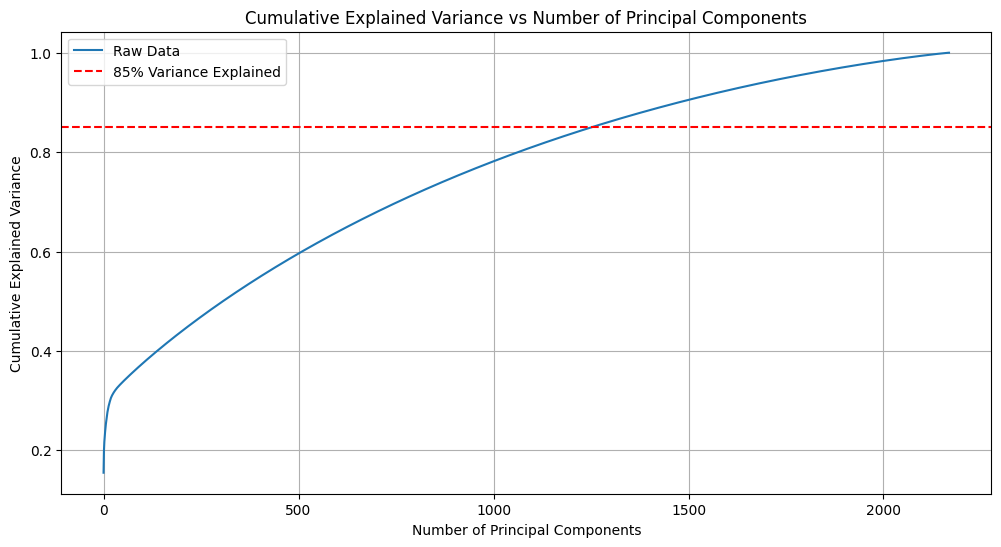

In [15]:
# Plot the cumulative explained variance versus number of PCs
plt.figure(figsize=(12, 6))
plt.plot(cumulative_explained_variance, label='Raw Data')
# plt.plot(cumulative_explained_variance_processed, label='Processed Data')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## 4. Plotting without Visualization Technique

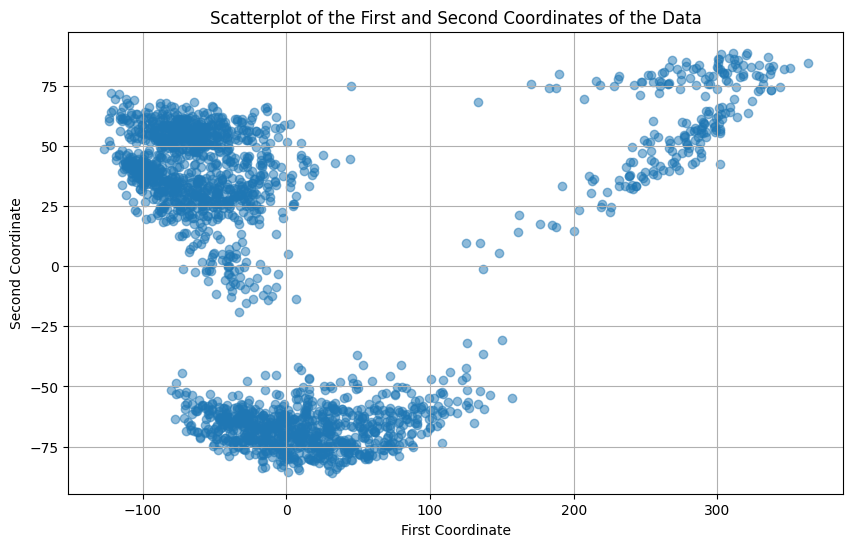

In [16]:
# Extract the first and second coordinates (columns) from the data
x = X_PCA[:, 0]
y = X_PCA[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('First Coordinate')
plt.ylabel('Second Coordinate')
plt.title('Scatterplot of the First and Second Coordinates of the Data')
plt.grid(True)
plt.show()

## 5. PCA_2D
Now find the top two principal components, and make a scatterplot of the projections of the data onto these two PC's.

In [17]:
pca_2d = PCA(n_components=2)

X_PCA2D = pca_2d.fit_transform(X)

In [18]:
pca_2d.explained_variance_ratio_[0]

0.15494937162426206

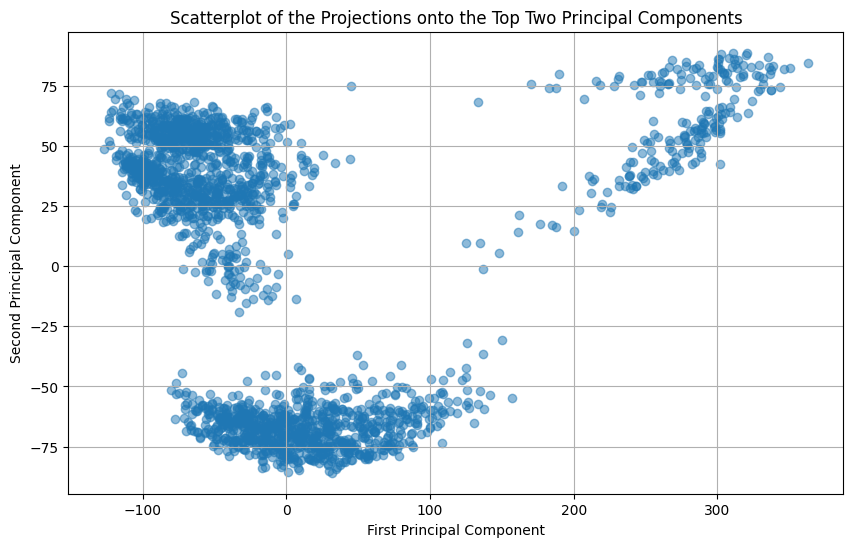

In [19]:
# Extract the projections onto the top two principal components
pc1 = X_PCA2D[:, 0]
pc2 = X_PCA2D[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatterplot of the Projections onto the Top Two Principal Components')
plt.grid(True)
plt.show()

## 6. MDS

/home/ha/.local/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


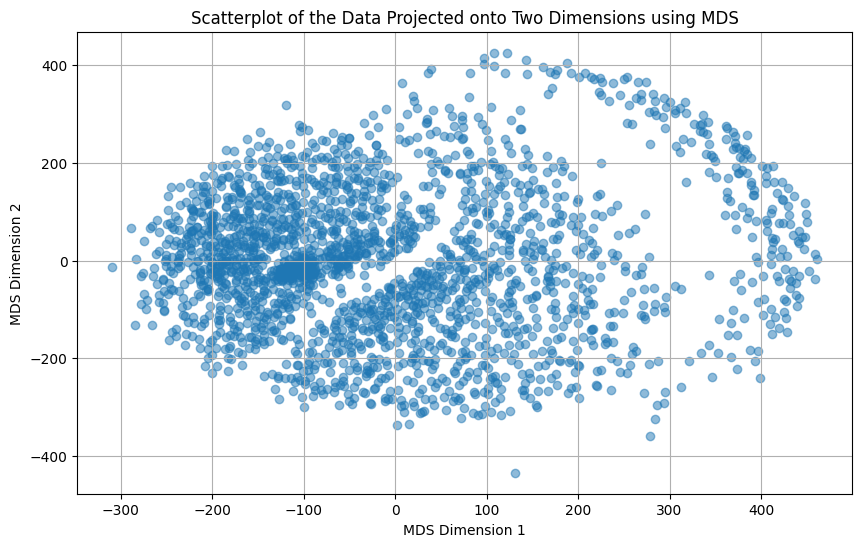

In [21]:
from sklearn.manifold import MDS

pca = PCA(n_components=0.80)  # Retain 80% of the variance
X_PCA = pca.fit_transform(X)

# Initialize and fit MDS
mds = MDS(n_components=2, random_state=42)
X_MDS = mds.fit_transform(X_PCA)

# Extract the projections onto the new 2D space
mds_dim1 = X_MDS[:, 0]
mds_dim2 = X_MDS[:, 1]

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(mds_dim1, mds_dim2, alpha=0.5)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Scatterplot of the Data Projected onto Two Dimensions using MDS')
plt.grid(True)
plt.show()

## 7. t-SNE

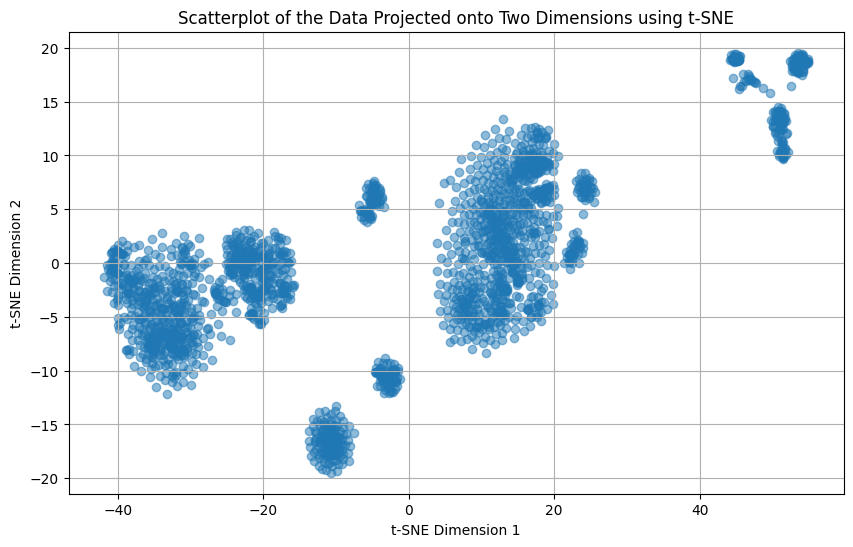

In [22]:
from sklearn.manifold import TSNE

# Step 2: Fit t-SNE to the PCA-transformed data
tsne = TSNE(n_components=2, perplexity=40, n_iter=2000, random_state=42)
X_TSNE = tsne.fit_transform(X_PCA)

# Extract the t-SNE projections
tsne_dim1 = X_TSNE[:, 0]
tsne_dim2 = X_TSNE[:, 1]

# Step 3: Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_dim1, tsne_dim2, alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Scatterplot of the Data Projected onto Two Dimensions using t-SNE')
plt.grid(True)
plt.show()

## 8. Visualizing K-means Clustering

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


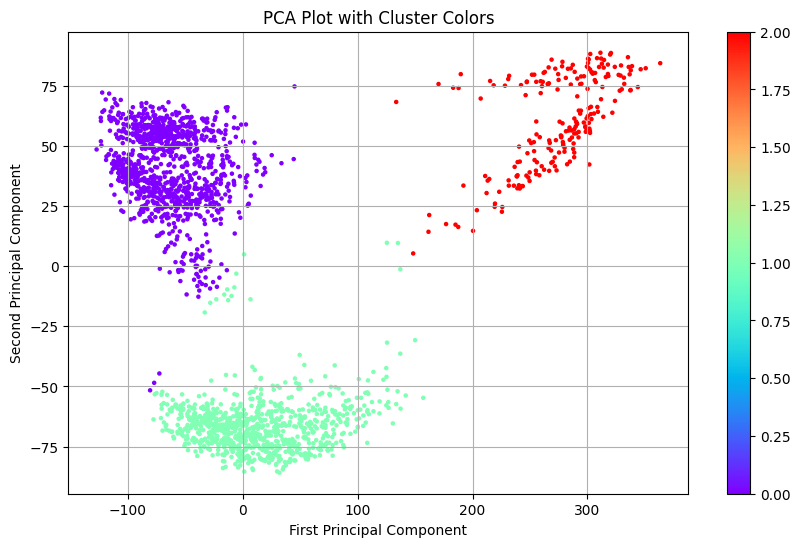

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


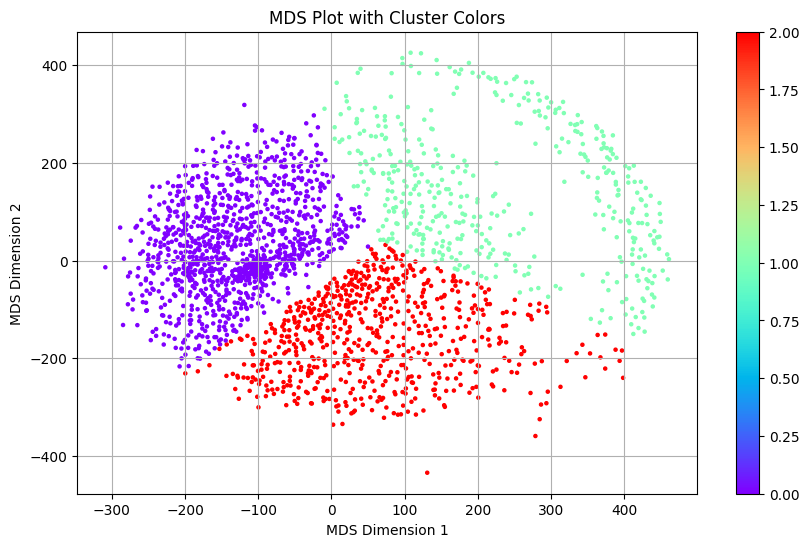

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


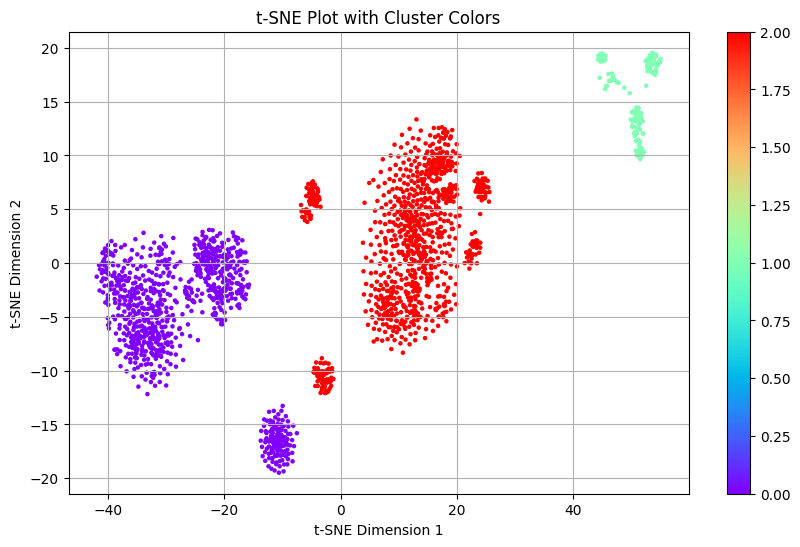

In [23]:
from sklearn.cluster import KMeans

# Function to create scatter plots with cluster colors
def create_scatter_plot(data, n_clusters, title, xlabel, ylabel):
    kmeans = KMeans(n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', s=5)
    plt.colorbar(scatter)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Step 2: PCA Plot
create_scatter_plot(X_PCA2D, 3, 'PCA Plot with Cluster Colors', 'First Principal Component', 'Second Principal Component')

# Step 3: MDS Plot
create_scatter_plot(X_MDS, 3, 'MDS Plot with Cluster Colors', 'MDS Dimension 1', 'MDS Dimension 2')

# Step 4: t-SNE Plot
create_scatter_plot(X_TSNE, 3, 't-SNE Plot with Cluster Colors', 't-SNE Dimension 1', 't-SNE Dimension 2')

## 9. Elbow Method

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/skl

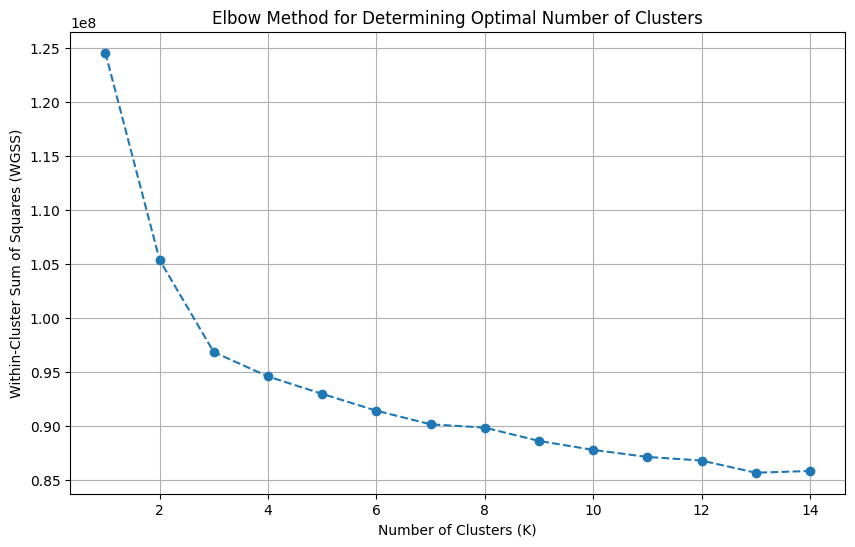

In [24]:
# Range of clusters to try
num_clusters_range = range(1, 15)
wgss = []

# Fit K-Means for each number of clusters and store the WGSS (inertia)
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_PCA)
    wgss.append(kmeans.inertia_)

# Plot WGSS versus number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, wgss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WGSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [25]:
# Determine the optimal number of clusters (visually inspect the plot to find the elbow)
optimal_num_clusters = 3  # Replace with your chosen number based on the plot

# Fit K-Means with the optimal number of clusters and calculate WGSS
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans_optimal.fit(X_PCA)
wgss_optimal = kmeans_optimal.inertia_

print("Number of clusters:", optimal_num_clusters)
print("WGSS at the chosen number of clusters: {:.2f}".format(wgss_optimal))


/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3
WGSS at the chosen number of clusters: 96857605.31


## QUESTION 2: Potential sub-type

## METHOD 1: Modify the number of clusters

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


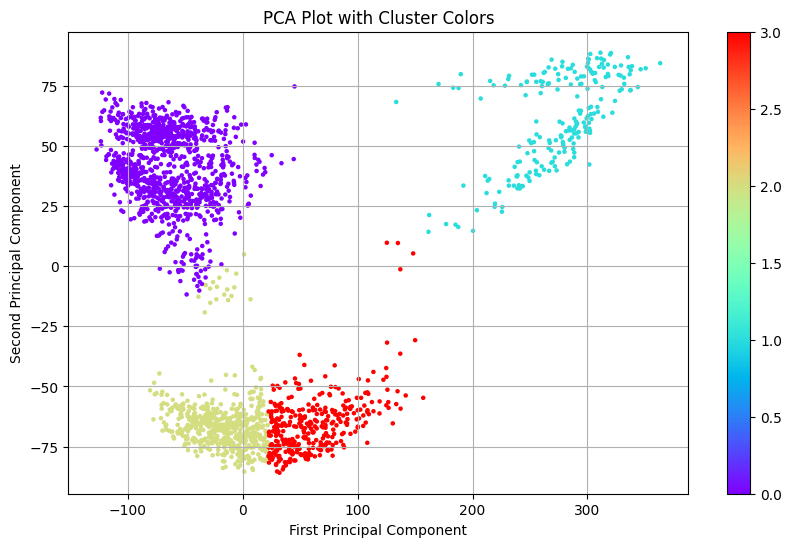

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


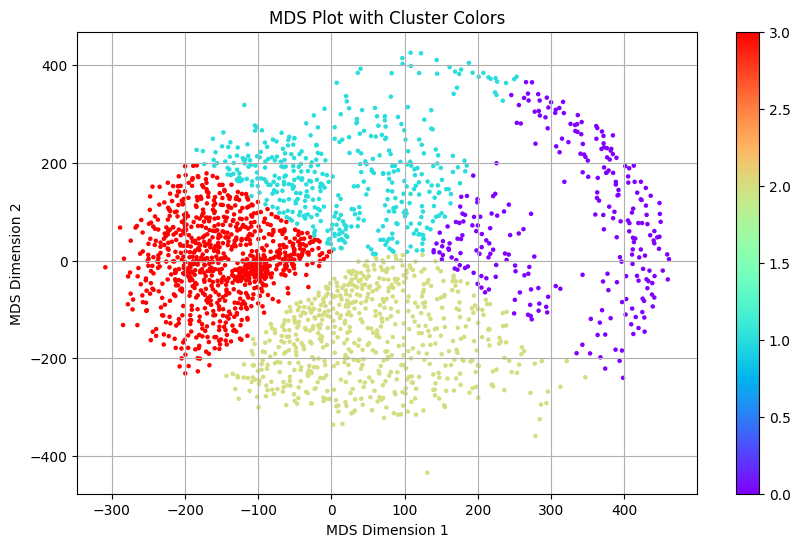

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


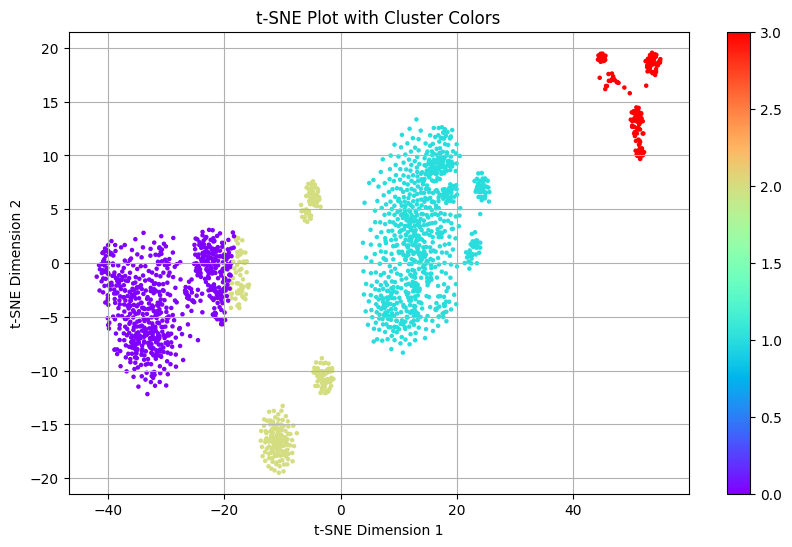

In [26]:
# Step 2: PCA Plot
create_scatter_plot(X_PCA2D, 4, 'PCA Plot with Cluster Colors', 'First Principal Component', 'Second Principal Component')

# Step 3: MDS Plot
create_scatter_plot(X_MDS, 4, 'MDS Plot with Cluster Colors', 'MDS Dimension 1', 'MDS Dimension 2')

# Step 4: t-SNE Plot
create_scatter_plot(X_TSNE, 4, 't-SNE Plot with Cluster Colors', 't-SNE Dimension 1', 't-SNE Dimension 2')

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


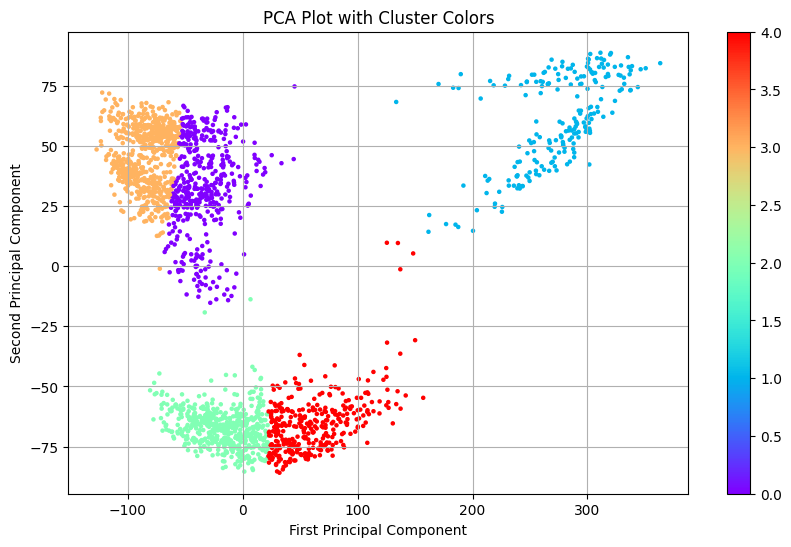

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


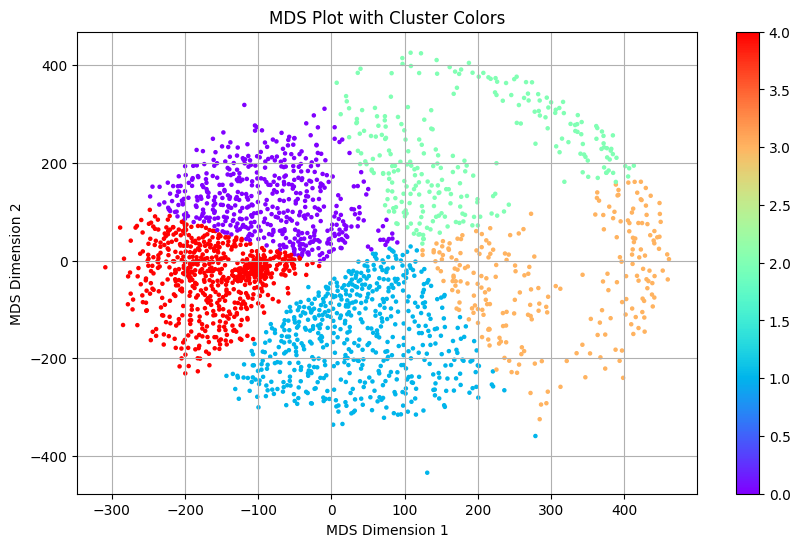

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


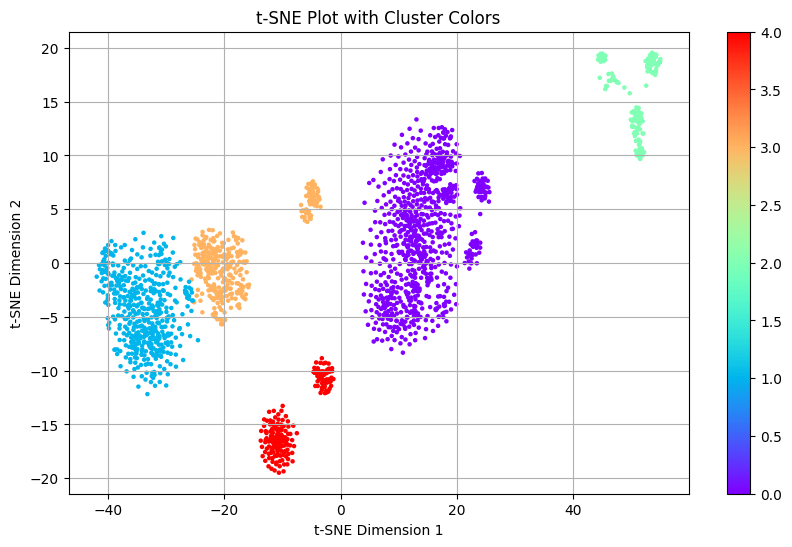

In [27]:
# Step 2: PCA Plot
create_scatter_plot(X_PCA2D, 5, 'PCA Plot with Cluster Colors', 'First Principal Component', 'Second Principal Component')

# Step 3: MDS Plot
create_scatter_plot(X_MDS, 5, 'MDS Plot with Cluster Colors', 'MDS Dimension 1', 'MDS Dimension 2')

# Step 4: t-SNE Plot
create_scatter_plot(X_TSNE, 5, 't-SNE Plot with Cluster Colors', 't-SNE Dimension 1', 't-SNE Dimension 2')

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


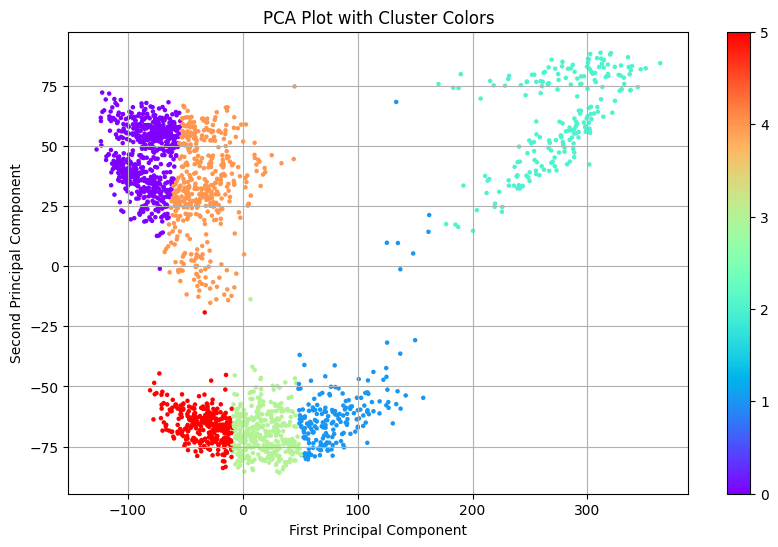

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


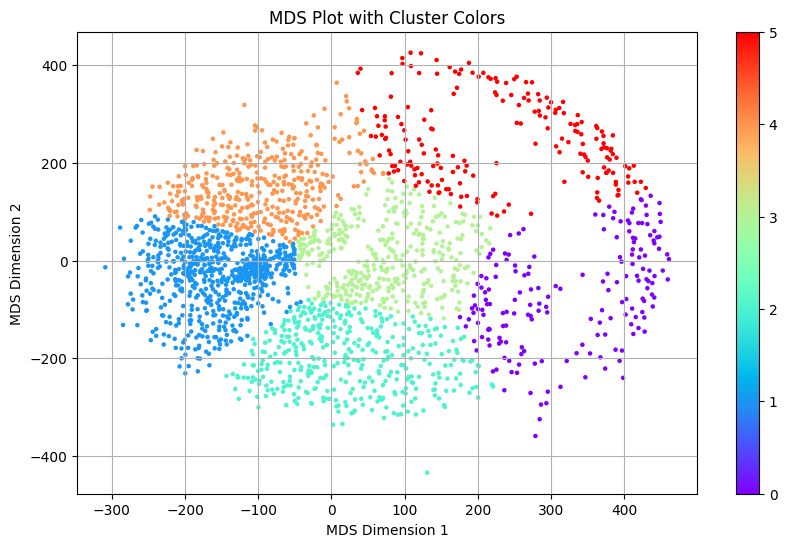

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


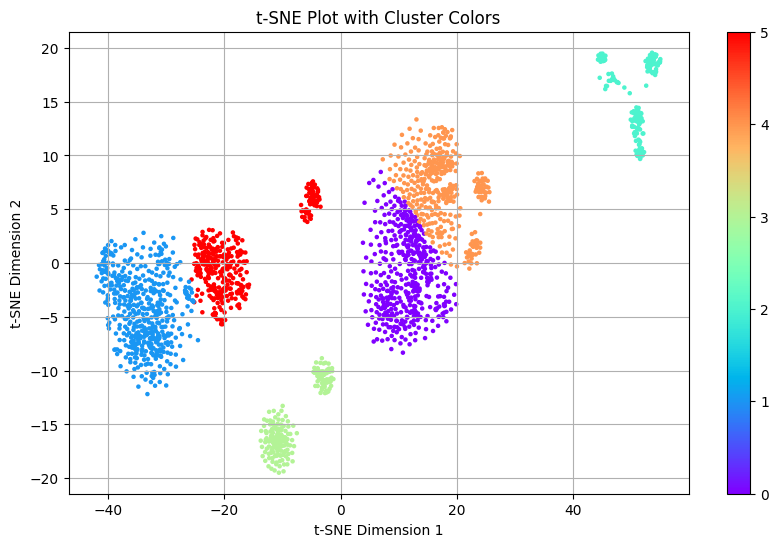

In [28]:
# Step 2: PCA Plot
create_scatter_plot(X_PCA2D, 6, 'PCA Plot with Cluster Colors', 'First Principal Component', 'Second Principal Component')

# Step 3: MDS Plot
create_scatter_plot(X_MDS, 6, 'MDS Plot with Cluster Colors', 'MDS Dimension 1', 'MDS Dimension 2')

# Step 4: t-SNE Plot
create_scatter_plot(X_TSNE, 6, 't-SNE Plot with Cluster Colors', 't-SNE Dimension 1', 't-SNE Dimension 2')

## METHOD 2. Clustering in the clusters

In [29]:
# Assuming df_tsne and clusters are from the previous steps
# clusters represent the main types (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_TSNE)
    
# Separate data based on main clusters
X_TSNE_1 = X_TSNE[clusters == 0]
X_TSNE_2 = X_TSNE[clusters == 1]
X_TSNE_3 = X_TSNE[clusters == 2]

# Apply KMeans clustering to find sub-types within each main type
kmeans_main1 = KMeans(n_clusters=2, random_state=42)  # Assuming 2 sub-types
sub_clusters_main1 = kmeans_main1.fit_predict(X_TSNE_1)

kmeans_main2 = KMeans(n_clusters=2, random_state=42)
sub_clusters_main2 = kmeans_main2.fit_predict(X_TSNE_2)

kmeans_main3 = KMeans(n_clusters=2, random_state=42)
sub_clusters_main3 = kmeans_main3.fit_predict(X_TSNE_3)

/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ha/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


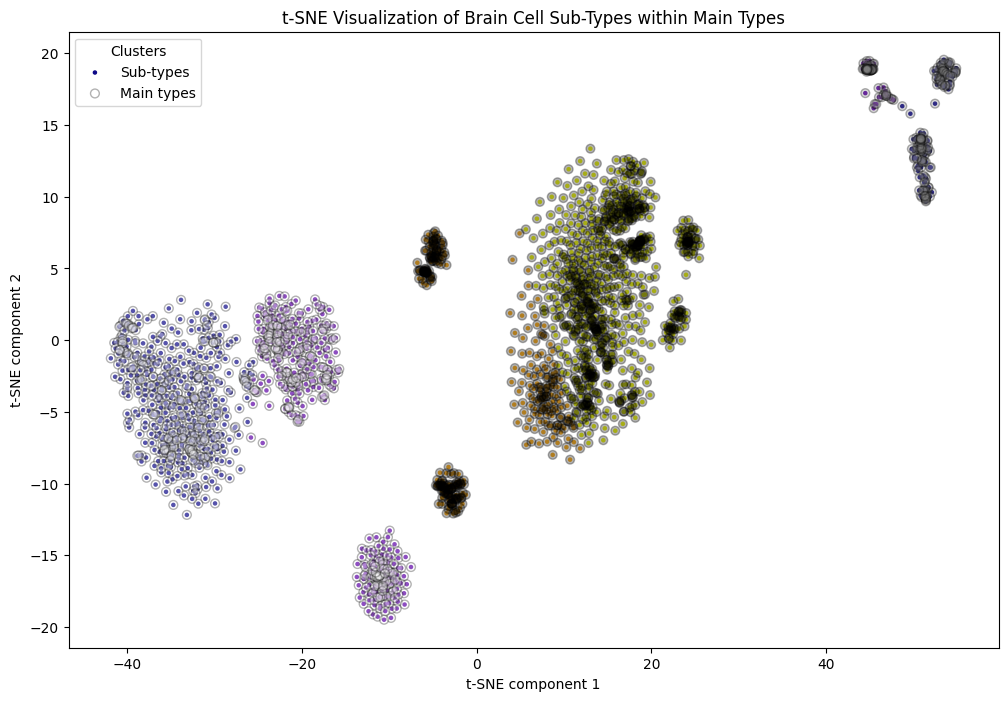

In [30]:
# Combine the sub-clustered data back into a single array for visualization
sub_clusters = np.concatenate([sub_clusters_main1, sub_clusters_main2, sub_clusters_main3 + 5])

# Create a combined dataset for visualization
df_tsne_combined = np.vstack((X_TSNE_1, X_TSNE_2, X_TSNE_3))
main_clusters = np.concatenate([np.zeros(len(X_TSNE_1)), 
                                np.ones(len(X_TSNE_2)), 
                                np.ones(len(X_TSNE_3)) * 2])

# Plotting the t-SNE results with sub-types highlighted
plt.figure(figsize=(12, 8))
plt.scatter(df_tsne_combined[:, 0], df_tsne_combined[:, 1], c=sub_clusters, cmap='plasma', s=5, label='Sub-types')
plt.scatter(df_tsne_combined[:, 0], df_tsne_combined[:, 1], c=main_clusters, cmap='binary', s=40, alpha=0.3, edgecolor='k', label='Main types')
plt.title('t-SNE Visualization of Brain Cell Sub-Types within Main Types')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(loc='best', title='Clusters')
plt.show()


## METHOD 3: Hierarchy

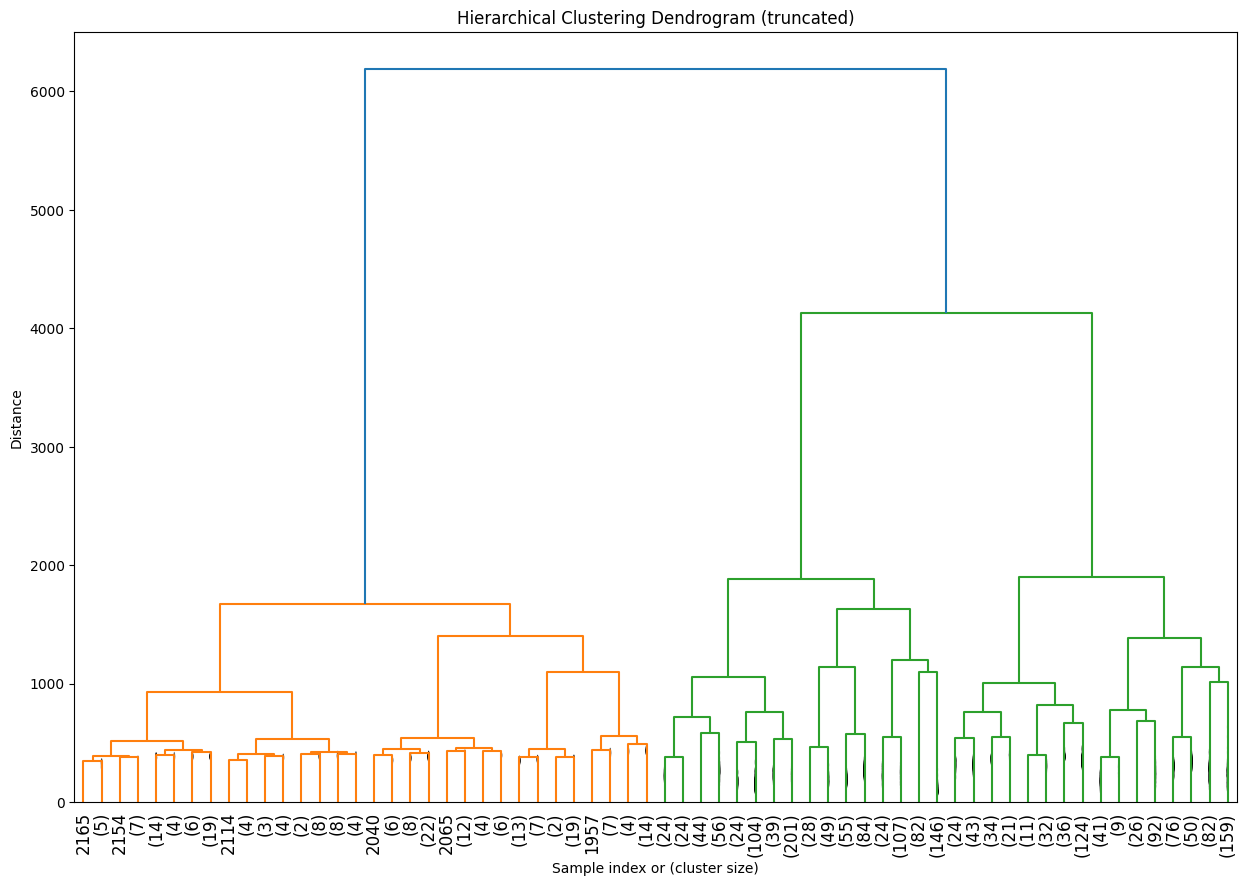

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
linked = linkage(X_PCA, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           truncate_mode='level',  # Show only the top levels of the dendrogram
           p=5,  # Number of top levels to show
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)  # to get a distribution impression in truncated branches
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()